In [1]:
# Imports and scripts
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
import pathmagic
%matplotlib inline
with pathmagic.context():
    import Preprocess as Prep
    import RelativePaths as RP
    import Evaluation as Eva

%run ../script/GatherData.py

Text(0.5, 1.0, 'Shows the number of files for every label, from JabRef')

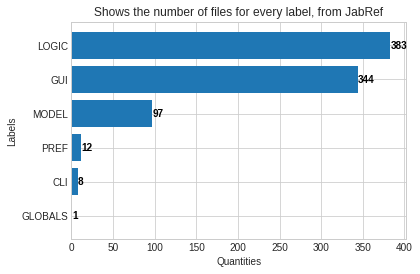

In [2]:
dataset_df = pd.read_csv(str(RP.getRawDataSet()))
y_labels = dataset_df.Label.unique()
x_quantity = [len(dataset_df.loc[dataset_df['Label']==label]) for label in y_labels]
tmp_df = pd.DataFrame({
    'Labels' : y_labels,
    'Quantity' : x_quantity
})
tmp_df = tmp_df.sort_values(by=['Quantity'])
plt.style.use("seaborn-whitegrid")
plt.barh(y=tmp_df.Labels, width=tmp_df.Quantity)
for i, v in enumerate(tmp_df.Quantity):
    plt.text(v, i, str(v), color='black', fontweight='bold', ha='left', va='center')

plt.xlabel('Quantities')
plt.ylabel('Labels')
plt.title('Shows the number of files for every label, from JabRef')

In [3]:
# Extractions & parsing
main_df = pd.read_csv('../Data/rawData.csv')
lib_settings =  [['lib', 'tow', 'jk', 'scw','lc', 'stem']]
pac_settings = [['pac', 'tow', 'jk']]
method_settings = [['pm', 'tow', 'jk', 'scw','lc', 'sw', 'stem']]

lib_parsed = Prep.preprocess_settings(lib_settings, '../Data/lib.csv')
pac_parsed = Prep.preprocess_settings(pac_settings, '../Data/pac.csv')
method_parsed = Prep.preprocess_settings(method_settings, '../Data/method.csv')

In [7]:
main_df['Libraries'] = lib_parsed['FileContent'].to_list()
main_df['Packages'] = pac_parsed['FileContent'].to_list()
main_df['Methods'] = method_parsed['FileContent'].to_list()
main_df.head()

,FileName,Label,FileContent,Libraries,Packages,Methods
0,GenerateCharacterTable.java,CLI,package net.sf.jabref.cli;\n\nimport java.util...,"[util, map, util, tree, map, net, sf, jabref, ...","[net, sf, jabref, cli]","[main, println, println, println, println, pri..."
1,ArgumentProcessor.java,CLI,package net.sf.jabref.cli;\n\nimport java.io.F...,"[io, file, io, ioexcept, nio, file, path, nio,...","[net, sf, jabref, cli]","[argument, processor, get, parser, result, par..."
2,XMPUtilMain.java,CLI,package net.sf.jabref.cli;\n\nimport java.io.B...,"[io, buffer, reader, io, file, io, file, input...","[net, sf, jabref, cli]","[main, pref, jab, ref, prefer, get, instanc, p..."
3,AuxCommandLine.java,CLI,package net.sf.jabref.cli;\n\nimport net.sf.ja...,"[net, sf, jabref, logic, auxpars, aux, parser,...","[net, sf, jabref, cli]","[aux, command, line, perform, aux, file, strin..."
4,ImportInspectionCommandLine.java,CLI,package net.sf.jabref.cli;\n\nimport java.util...,"[util, collect, util, collect, util, link, lis...","[net, sf, jabref, cli]","[add, entri, set, progress, queri, add, set, s..."


In [5]:
from sklearn.model_selection import train_test_split

train_cols = main_df.columns[3:]
label = main_df['Label']

X = main_df[train_cols]
y = pd.DataFrame({'Label':label})
print(type(X))
print(type(y))
print(y)
seed = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90, random_state=seed)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
    Label
0     CLI
1     CLI
2     CLI
3     CLI
4     CLI
..    ...
840  PREF
841  PREF
842  PREF
843  PREF
844  PREF

[845 rows x 1 columns]


In [10]:
from interpret import show
from interpret.data import ClassHistogram
print(X_train)
print(y_train)
hist = ClassHistogram().explain_data(X_train, y_train, name = 'Train Data')
show(hist)

                                             Libraries  \
418                         [util, compar, util, list]   
288  [io, ioexcept, net, url, util, array, list, ut...   
648  [net, sf, jabref, logic, l, n, local, net, sf,...   
166  [awt, datatransf, data, flavor, awt, datatrans...   
595  [util, list, util, object, util, option, util,...   
..                                                 ...   
715  [io, ioexcept, net, url, util, object, util, o...   
767  [util, array, list, util, array, util, collect...   
72                                                  []   
235                                                 []   
37   [awt, border, layout, awt, compon, awt, event,...   

                                              Packages  \
418                 [net, sf, jabref, logic, exporter]   
288              [net, sf, jabref, gui, externalfiles]   
648  [net, sf, jabref, logic, formatter, bibtexfields]   
166                     [net, sf, jabref, gui, groups]   
595          

SystemError: <built-in method view of numpy.ndarray object at 0x7ff475b0f990> returned a result with an error set

In [ ]:
from interpret.glassbox import ExplainableBoostingClassifier, LogisticRegression, ClassificationTree, DecisionListClassifier

ebm = ExplainableBoostingClassifier(random_state=seed, n_jobs=-1)
ebm.fit(X_train, y_train)   #Works on dataframes and numpy arrays